In [7]:
#Load and Clean winning Location Data
import pandas as pd
import requests
import folium
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap

# Load the scraped location data
file_path = "toto_winning_loc.xlsx"
with open("toto_winning_loc.xlsx", "rb") as f:
    df = pd.read_excel(f)


# Display sample data
print(df.head())

df.columns = df.columns.str.strip().str.lower()  # Remove extra spaces & lowercase
df.rename(columns={'outlet': 'Location'}, inplace=True)

# Drop rows where location is missing
df = df[df['Location'].str.lower() != 'singapore']

print(f"Total unique locations: {df['Location'].nunique()}")


                                     Outlet  Group 1 winning frequency  \
0   Singapore Pools Account Betting Service                        163   
1                    Delisia Agency Pte Ltd                         22   
2                             Tong Aik Huat                         20   
3                        NTUC FairPrice NEX                         17   
4  Singapore Pools King George's Ave Branch                         15   

   Group 2 winning frequency  Group 1 & 2 winning frequency  
0                        940                           1103  
1                         90                            112  
2                        121                            141  
3                         69                             86  
4                         35                             50  
Total unique locations: 365


In [8]:
#Convert Winning locations to latitude/longitude
import time

# Initialize Geocoder
geolocator = Nominatim(user_agent="sg_toto_locator")

# Function to get coordinates
def get_lat_long(location):
    try:
        location = geolocator.geocode(location + ", Singapore")  # Ensure it's Singapore
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except:
        return None, None

# Apply Geocoding
df[['Latitude', 'Longitude']] = df['Location'].apply(lambda loc: pd.Series(get_lat_long(loc)))

# Drop rows with missing coordinates
df = df.dropna(subset=['Latitude', 'Longitude'])

# Save cleaned data
df.to_csv("toto_winning_locations_geocoded.csv", index=False)
print("Geocoded data saved successfully!")


Geocoded data saved successfully!


In [9]:
# Create an interactive map of winning locations
# Create a base map centered around Singapore
sg_map = folium.Map(location=[1.3521, 103.8198], zoom_start=11)

# Add winning locations as markers
for _, row in df.iterrows():
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=row["Location"],
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(sg_map)

# Save the map as HTML
sg_map.save("toto_winning_locations_map.html")

# Display map
sg_map


In [10]:
#create a heatmap for winning locations
# Initialize a map
heatmap = folium.Map(location=[1.3521, 103.8198], zoom_start=11)

# Add HeatMap layer
heat_data = df[['Latitude', 'Longitude']].values.tolist()
HeatMap(heat_data).add_to(heatmap)

# Save map
heatmap.save("toto_winning_locations_heatmap.html")

# Display heatmap
heatmap


C:\Users\nurul\AppData\Local\Temp\ipykernel_24940\1370410383.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_counts.head(10), x='Win Frequency', y='Location', palette='viridis')


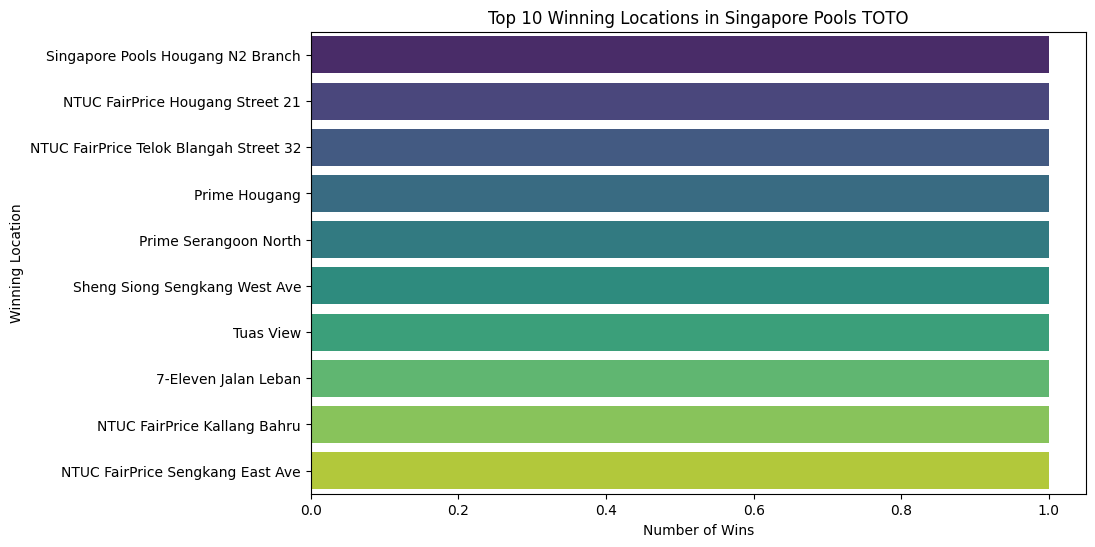

In [11]:
#statistical analysis of winning locations
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of wins per location
location_counts = df['Location'].value_counts().reset_index()
location_counts.columns = ['Location', 'Win Frequency']

# Plot the top 10 locations with the most wins
plt.figure(figsize=(10,6))
sns.barplot(data=location_counts.head(10), x='Win Frequency', y='Location', palette='viridis')
plt.xlabel("Number of Wins")
plt.ylabel("Winning Location")
plt.title("Top 10 Winning Locations in Singapore Pools TOTO")
plt.show()
